<a href="https://colab.research.google.com/github/theakash07/Machine_learning/blob/main/Survival_training_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.rcParams["figure.figsize"]=(20,10)

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COllab data files/Titanic-Dataset.csv')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail(5) #it's for output of last five rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Now we need to clean the data and have to remove the features which are not necessary for the prediction of this model.


In [ ]:
df.describe() #describe the whole columns of this data frame

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df1=df.copy() # copying the data frame to the new datafram

I'm taking mean of the whole Ages and putting it at the null places.

In [ ]:
df1['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [ ]:
df1['Age'].describe() #the mean of the age is 29.69

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

We found the mean of the age and rn i'm putting those values at the null places of ages


In [ ]:
df1['Age'].isnull().sum()
#Number of total values which are null in the data set of the age

177

In [ ]:
mean_age = df1['Age'].mean() #the mean age
print(mean_age)
df1['Age'].fillna(mean_age, inplace=True)

29.69911764705882


In [ ]:
df1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


so successfully we have inseted the mean of the ages at the null places

In [ ]:
df1['Age'].isnull().sum() #you can see there is not such null values for the age in the data set

0

Now Moving further and remvoing all the features which are not important to move with.
I'm removing the columns like **Cabin**,**Ticket**,**Embarked**

In [ ]:
#making a copy of the current data set to keep intact the data set at all the stages
df2=df1.copy()
df2=df1.drop(['Ticket','Cabin','Embarked'], axis=1)
df2.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


Now gonna plot the the graph of survival respect to class(in which peopel living)

<function matplotlib.pyplot.show(close=None, block=None)>

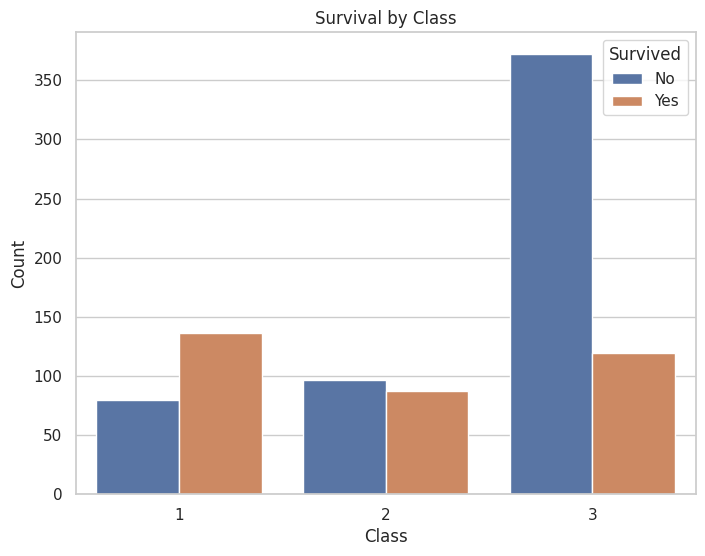

In [ ]:
import seaborn as sns #advance form of matplotlib
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df2, x='Pclass', hue='Survived')

#adding the label
plt.title('Survival by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show


You can clearly see in the above graph that most of people who belongs to 3rd class have died.


Now gonna draw a scatterplot graph of survival respect to Age


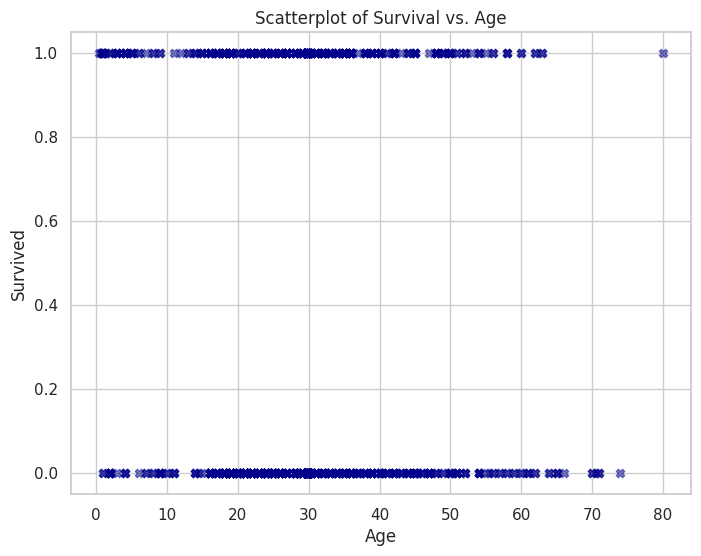

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df2['Age'],df2['Survived'], alpha=0.5, marker='X',c='darkblue')
plt.title('Scatterplot of Survival vs. Age')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

In [21]:
df2['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

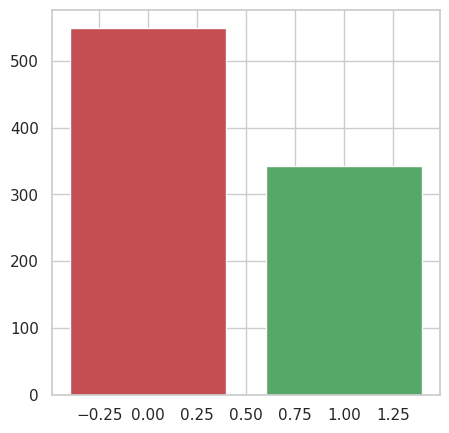

In [28]:
plt.figure(figsize=(5,5))
plt.bar(list(df2['Survived'].value_counts().keys()), list(df2['Survived'].value_counts()), color=['r','g'])
plt.show()

In [25]:
df2['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

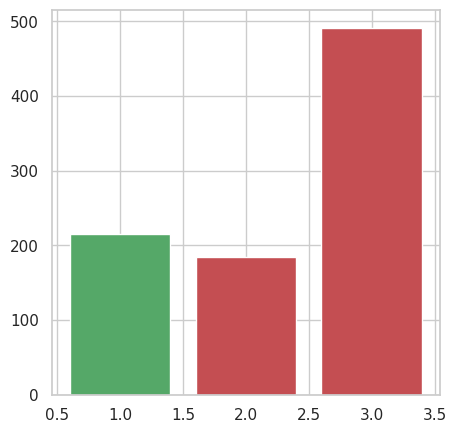

In [33]:
# Assuming df2 is your DataFrame
# Create a figure with a 5x5 inch size
plt.figure(figsize=(5, 5))

# Create a bar plot using the 'Pclass' column from df2
# 'Pclass' values are on the x-axis, their counts are on the y-axis
# Use 'r' (red) for the first bar and 'g' (green) for the second bar
plt.bar(list(df2['Pclass'].value_counts().keys()), list(df2['Pclass'].value_counts()), color=['r', 'g'])

# Display the plot
plt.show()


In [ ]:
#writing the sigmoid funtion for this
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g